# **Trabajo Practico 3**

Entrega:
       
*   Barbara
*   Pedro Perez

**TRABAJO PRACTICO 3:**
1. ENCONTRAR EL LOGOTIPO DE LA GASEOSA DENTRO DE LAS IMAGENES PREVISTAS.

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [12]:
# Se define un directorio donde se encuentran las imágenes.
# Se define un directorio donde se encuentran las imágenes.
directorio = "./images"
imagenes = os.listdir(directorio)
imagenes = [img for img in imagenes if img.endswith(('.png', '.jpg', '.jpeg'))]
template = cv2.imread('./template/pattern.png', cv2.IMREAD_GRAYSCALE)
objetivos = []

In [13]:
# Verificación del template
if template is None:
    raise ValueError("El template no se pudo cargar. Verifica la ruta del archivo.")

objetivos = []
for file in imagenes:
    filepath = os.path.join(directorio, file)
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    
    # Verificación de la carga de imágenes
    if img is None:
        print(f"Advertencia: La imagen {file} no se pudo cargar.")
        continue
    
    objetivos.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


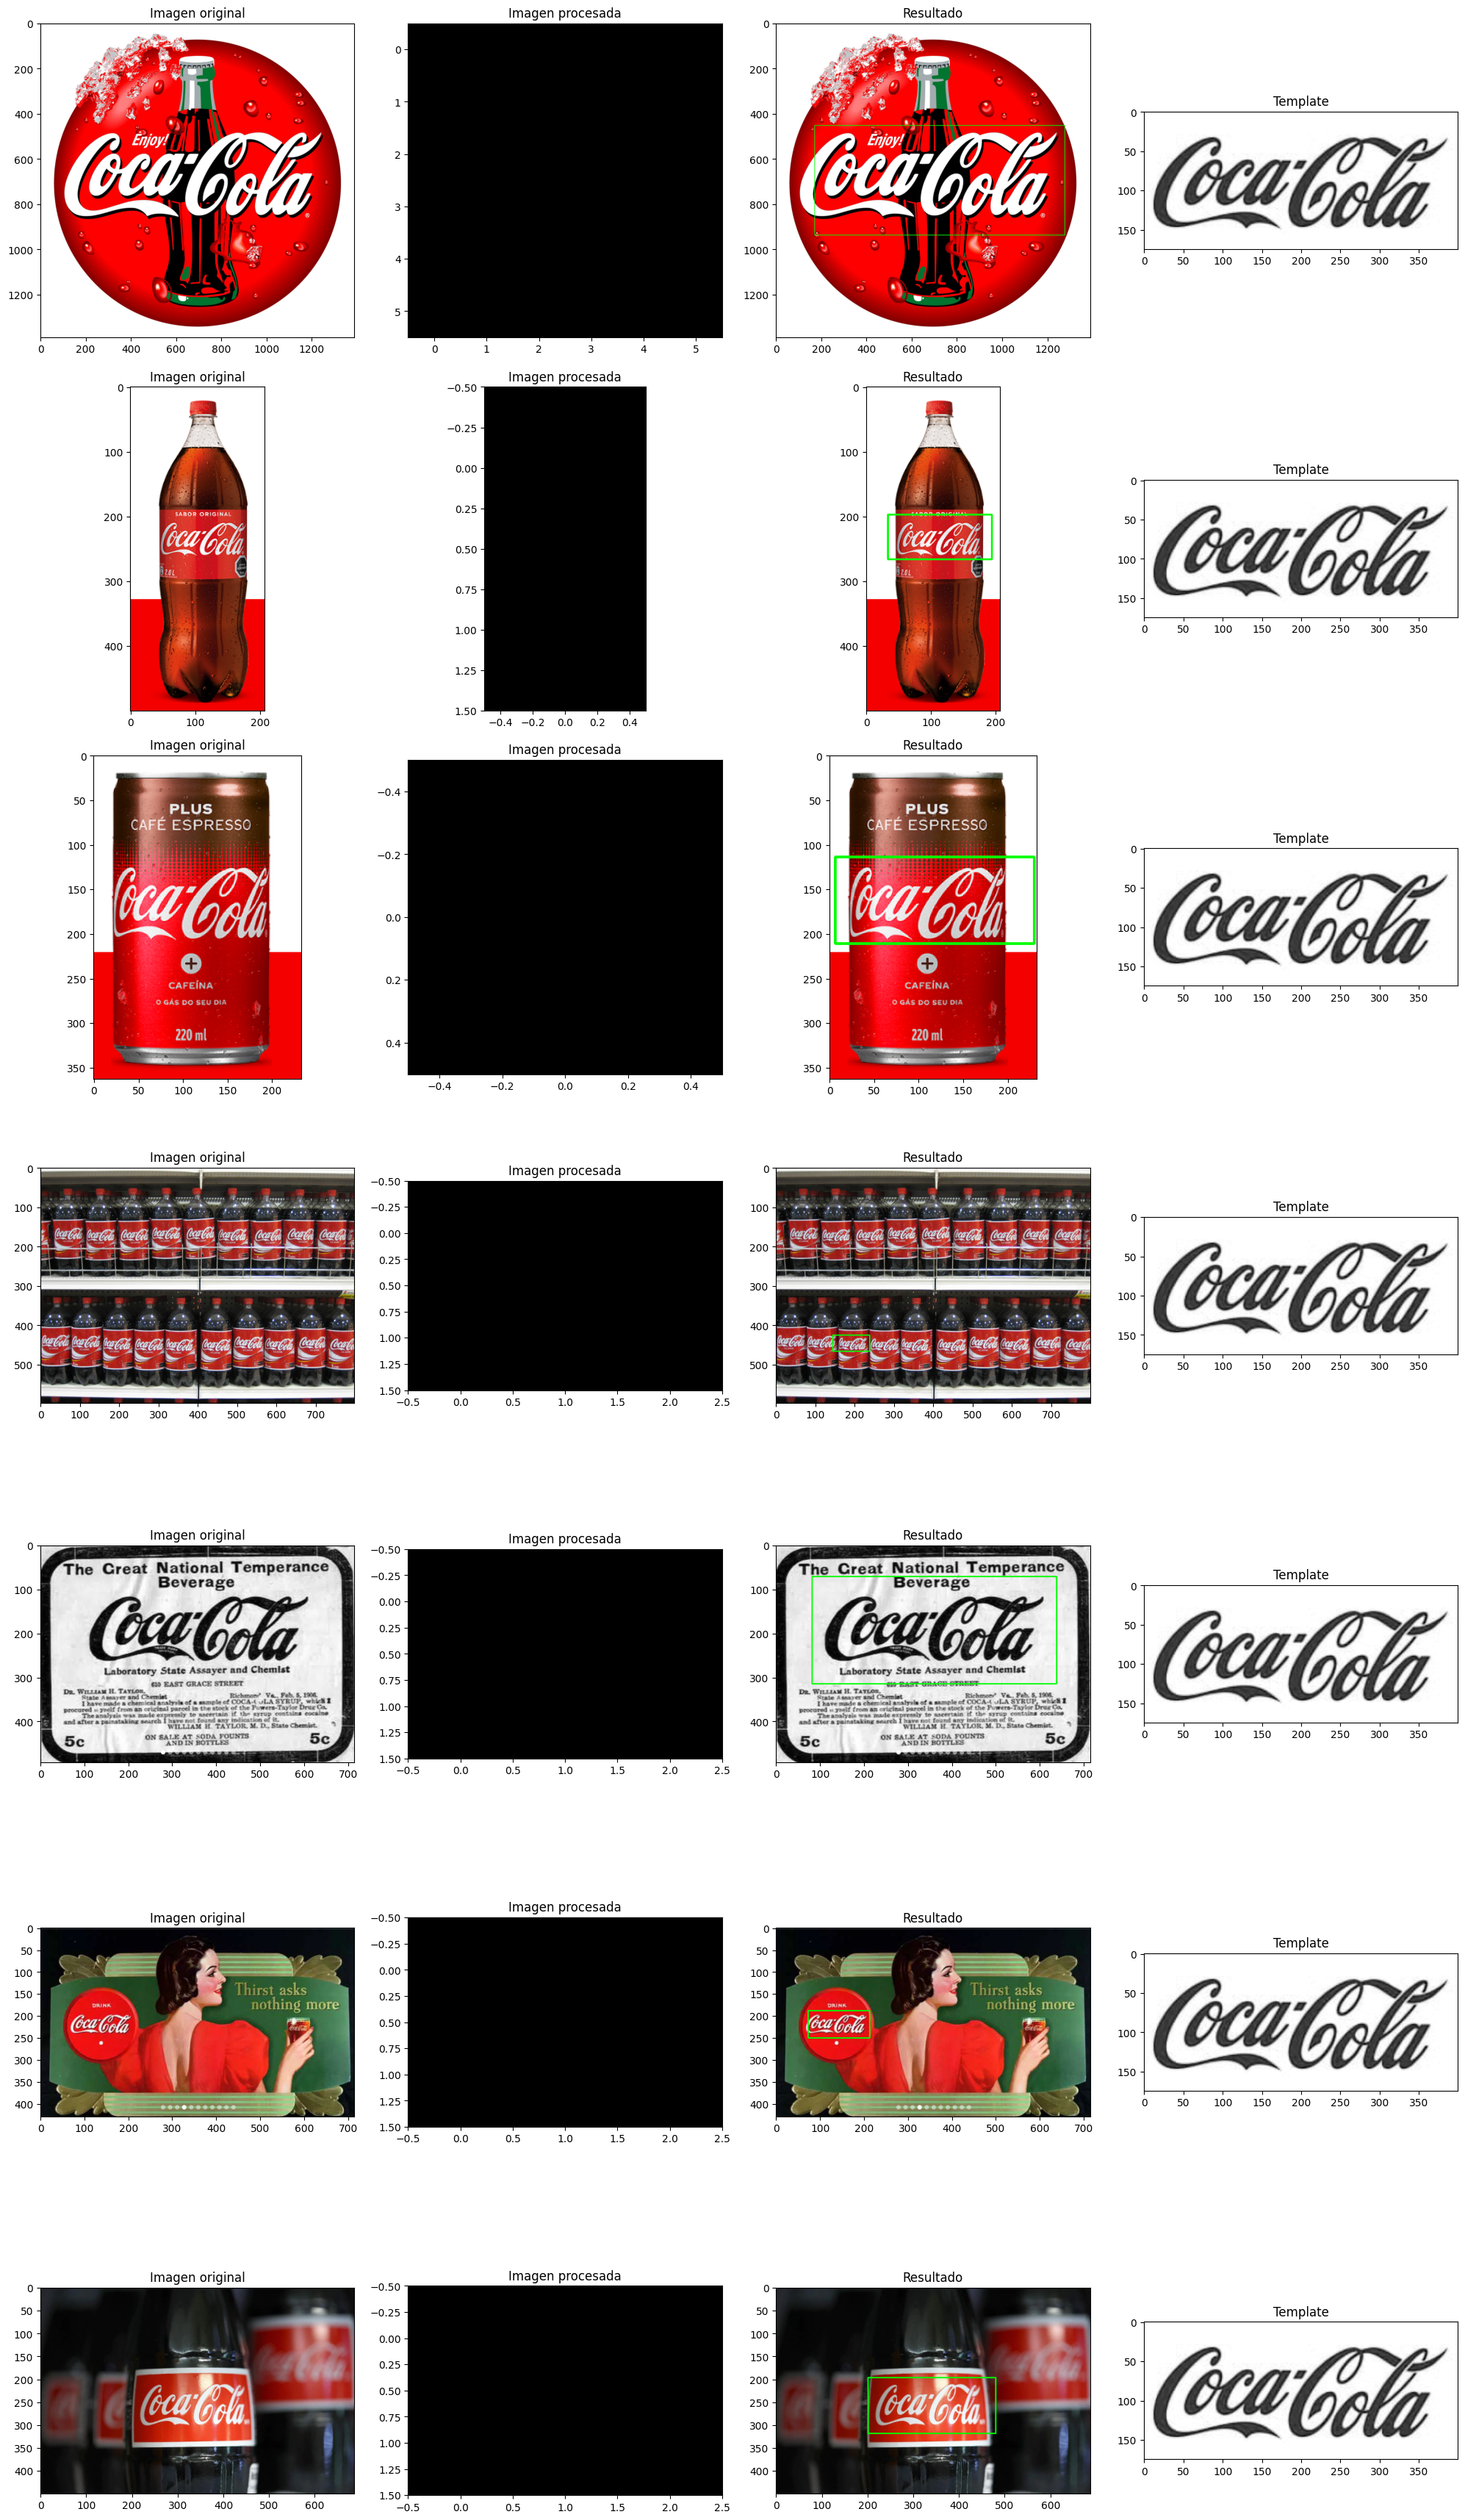

In [17]:
# Comprobación de seguridad para asegurarse de que se hayan cargado imágenes
if len(objetivos) == 0:
    raise ValueError("No se han cargado imágenes. Verifica la ruta del directorio y las extensiones de archivo.")

# Creación de una figura con varias filas y cuatro columnas, para cada objetivo en la lista de objetivos
fig, axs = plt.subplots(len(objetivos), 4, figsize=(20, 5 * len(objetivos)))

for i, objetivo in enumerate(objetivos):
    # Aplicación del algoritmo de Canny al template
    template_c = cv2.Canny(template, 50, 200)
    output = objetivo.copy()

    # Inicialización de variables
    coords = None
    map = None
    resultado = None
    mejor_match = None
    mejor_escala = None

    # Búsqueda del template en objetivos de distinto tamaño usando matching template
    for scale in np.linspace(0.005, 5.0, 15)[::-1]:
        objetivo_gray = cv2.cvtColor(objetivo, cv2.COLOR_RGB2GRAY)
        rescaled_objetivo = cv2.resize(objetivo_gray, (int(objetivo_gray.shape[1] * scale), int(objetivo_gray.shape[0] * scale)), interpolation=cv2.INTER_AREA)

        # Aplicación de filtros para resaltar características
        objetivo_gauss = cv2.GaussianBlur(rescaled_objetivo, (7, 7), 11)
        tadap = cv2.adaptiveThreshold(objetivo_gauss, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 21)

        # Detección de bordes en la imagen escalada
        rescaled_objetivo_c = cv2.Canny(tadap, 240, 250)

        # Verificación de que la imagen escalada no sea más pequeña que el template
        if rescaled_objetivo.shape[0] <= template.shape[0] or rescaled_objetivo.shape[1] <= template.shape[1]:
            continue

        # Template matching y actualización del mejor resultado
        res = cv2.matchTemplate(rescaled_objetivo_c, template_c, cv2.TM_CCOEFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if mejor_match is None or max_val > mejor_match:
            mejor_match = max_val
            mejor_escala = scale
            coords = max_loc
            map = res
            resultado = rescaled_objetivo.copy()

    # Dibujo del rectángulo alrededor del logotipo detectado en la imagen original
    if coords is not None:
        top_left = (int(coords[0] / mejor_escala), int(coords[1] / mejor_escala))
        bottom_right = (int((coords[0] + template.shape[1]) / mejor_escala), int((coords[1] + template.shape[0]) / mejor_escala))
        cv2.rectangle(output, top_left, bottom_right, (0, 255, 0), 2)

    # Visualización de la imagen original, la imagen procesada, el resultado y el template
    axs[i, 0].imshow(objetivo)
    axs[i, 0].set_title('Imagen original')
    axs[i, 1].imshow(rescaled_objetivo_c, cmap='gray')
    axs[i, 1].set_title('Imagen procesada')
    axs[i, 2].imshow(output, cmap='gray')  # Cambio de 'resultado' a 'output' para mostrar el rectángulo en la imagen original
    axs[i, 2].set_title('Resultado')
    axs[i, 3].imshow(template, cmap='gray')
    axs[i, 3].set_title('Template')

plt.tight_layout()
plt.show()


1. **Aplicación del algoritmo de Canny:**
    - El algoritmo de Canny se utiliza para detectar bordes tanto en la imagen como en el template. Esto se logra con la línea `template_c = cv2.Canny(template, 50, 200)` para el template y `rescaled_objetivo_c = cv2.Canny(tadap, 240, 250)` para la imagen escalada. La detección de bordes ayuda a mejorar la precisión del template matching al enfocarse en las características estructurales de la imagen.

2. **Template matching a diferentes escalas:**
    - Para cada imagen, se realiza una búsqueda del template a diferentes escalas. Esto se logra mediante un bucle que redimensiona la imagen (`rescaled_objetivo = cv2.resize(...)`) y luego aplica el template matching (`res = cv2.matchTemplate(...)`). El objetivo es encontrar la mejor coincidencia del template en la imagen, teniendo en cuenta que el logotipo puede estar presente en diferentes tamaños.

3. **Umbral de detección:**
    - Se establece un umbral de detección para determinar si se ha encontrado una coincidencia significativa. Esto se verifica con la línea `if mejor_match is None or max_val > mejor_match:`. Si el valor máximo de coincidencia (`max_val`) supera el mejor valor encontrado hasta el momento (`mejor_match`), se actualiza la ubicación de la coincidencia y el valor de `mejor_match`.

4. **Visualización de resultados:**
    - Las imágenes se muestran en una figura con varias filas y cuatro columnas. Cada fila corresponde a una imagen y se muestran cuatro versiones: la imagen original, la imagen procesada con bordes detectados, el resultado de la detección con el logotipo resaltado y el template utilizado para la detección.
    - El rectángulo verde que resalta el logotipo detectado se dibuja en la imagen original con la línea `cv2.rectangle(output, top_left, bottom_right, (0, 255, 0), 2)`, donde `top_left` y `bottom_right` son las coordenadas del rectángulo.



2. Planer y validaar un algoritmo para multiples deteccones en la imagen multi.png

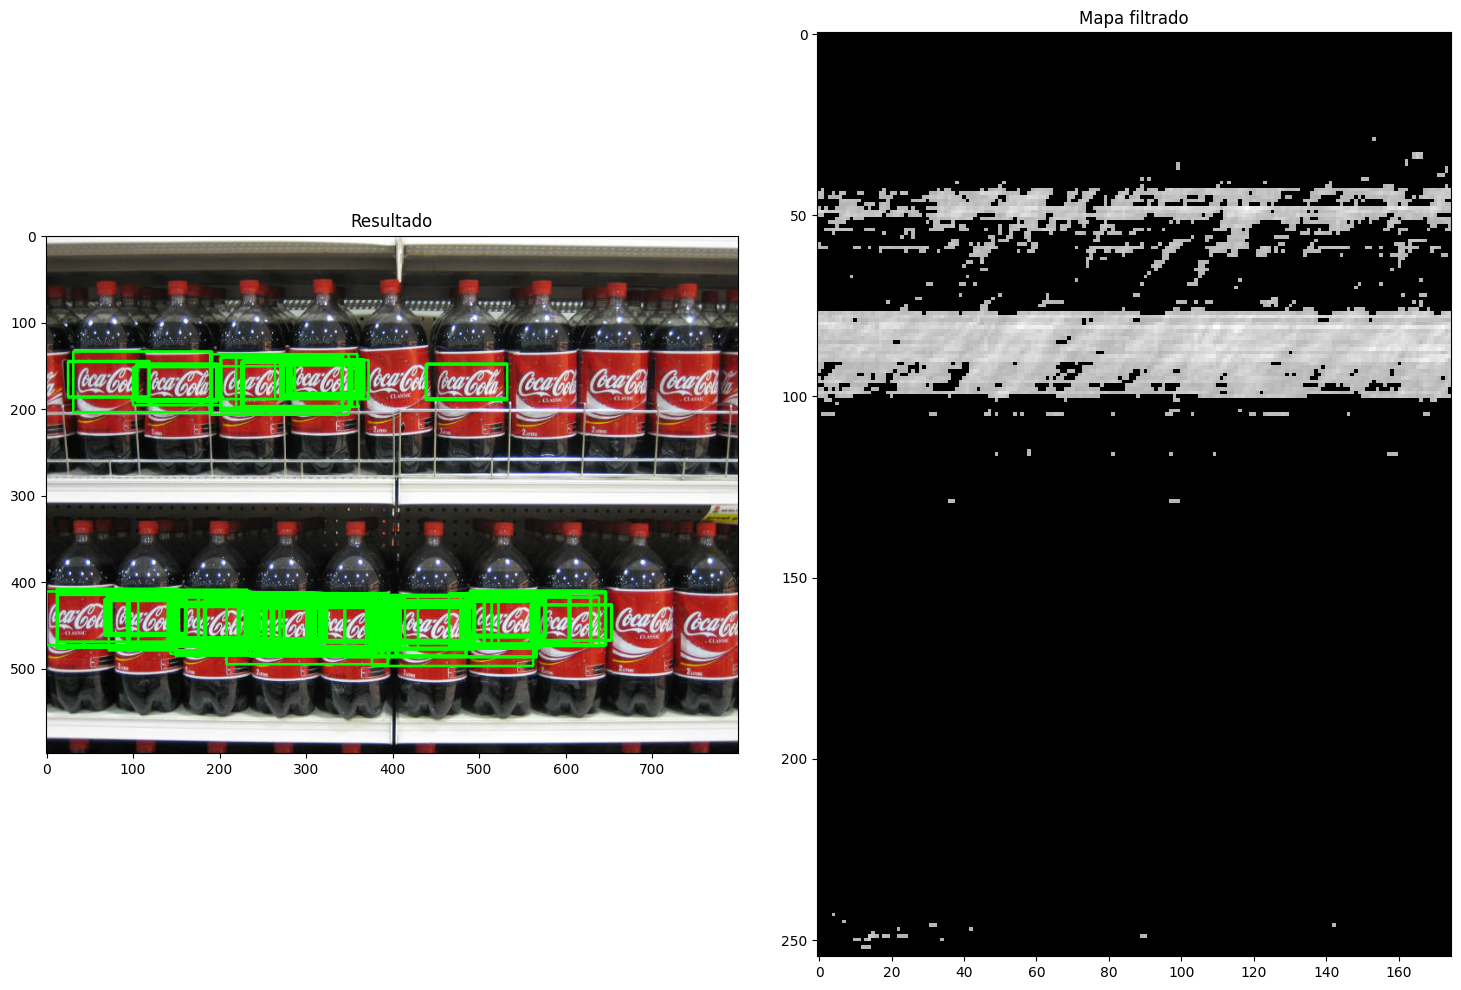

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Carga de la imagen y el template
imagen_path = "./images/coca_multi.png"
imagen = cv2.imread(imagen_path, cv2.IMREAD_COLOR)
template = cv2.imread('./template/pattern.png', cv2.IMREAD_GRAYSCALE)
template_c = cv2.Canny(template, 50, 200)  # Aplicar Canny al template para detectar bordes

# Definición de variables de procesamiento
fig, axs = plt.subplots(1, 2, figsize=(15, 10))  # Crear figura para mostrar resultados
output = imagen.copy()  # Copiar la imagen original para dibujar las detecciones

# Búsqueda de plantilla en varias escalas de la imagen
for scale in np.linspace(0.005, 5.0, 15)[::-1]:  # Bucle sobre diferentes escalas
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)  # Convertir imagen a escala de grises
    rescaled_imagen = cv2.resize(imagen_gray, (int(imagen_gray.shape[1] * scale), int(imagen_gray.shape[0] * scale)), interpolation=cv2.INTER_AREA)  # Redimensionar la imagen de acuerdo a la escala actual
    imagen_gauss = cv2.GaussianBlur(rescaled_imagen, (7, 7), 11)  # Aplicar filtro Gaussiano para suavizar la imagen
    tadap = cv2.adaptiveThreshold(imagen_gauss, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 21)  # Aplicar umbral adaptativo
    rescaled_imagen_c = cv2.Canny(tadap, 240, 250)  # Aplicar Canny para detectar bordes

    if rescaled_imagen.shape[0] < template.shape[0] or rescaled_imagen.shape[1] < template.shape[1]:  # Verificar si la imagen escalada es más pequeña que el template
        continue

    res = cv2.matchTemplate(rescaled_imagen_c, template_c, cv2.TM_CCORR_NORMED)  # Realizar template matching
    filtered_map = res * (res > 0.07)  # Aplicar filtro para conservar solo valores por encima de un umbral
    loc = np.where(filtered_map > 0.1)  # Encontrar ubicaciones con valores por encima de otro umbral

    for pt in zip(*loc[::-1]):  # Dibujar rectángulos para las detecciones
        cv2.rectangle(output, (int(pt[0] / scale), int(pt[1] / scale)),
                      (int((pt[0] + template.shape[1]) / scale), int((pt[1] + template.shape[0]) / scale)), (0, 255, 0), 2)

# Mostrar el resultado y el mapa filtrado
axs[0].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[0].set_title('Resultado')
axs[1].imshow(filtered_map, cmap='gray')
axs[1].set_title('Mapa filtrado')

plt.tight_layout()
plt.show()



Implementacion de un algoritmo para la detección de múltiples coincidencias de un template en una imagen, en este caso, la imagen `coca_multi.png`. A continuación, se explica el código paso a paso:

1. **Importación de bibliotecas:** Se importan las bibliotecas necesarias para el procesamiento de imágenes y la visualización de resultados.

2. **Carga de la imagen y el template:** Se carga la imagen `coca_multi.png` y el template (patrón a buscar) utilizando la función `cv2.imread`. Además, se aplica el algoritmo de Canny al template para detectar sus bordes, lo que ayuda a mejorar la precisión del template matching.

3. **Definición de variables de procesamiento:** Se crea una figura con dos subplots para mostrar los resultados y se prepara una copia de la imagen original (`output`) para dibujar las detecciones.

4. **Búsqueda de plantilla en varias escalas de la imagen:** Se realiza un bucle sobre diferentes escalas de la imagen original para buscar el template en diferentes tamaños. Para cada escala:
   - Se convierte la imagen a escala de grises.
   - Se redimensiona la imagen de acuerdo a la escala actual.
   - Se aplica un filtro gaussiano para suavizar la imagen.
   - Se utiliza un umbral adaptativo para resaltar las características importantes.
   - Se aplica el algoritmo de Canny para detectar los bordes.
   - Si la imagen escalada es más pequeña que el template, se salta la escala actual.
   - Se realiza el template matching utilizando la función `cv2.matchTemplate` con el método de correlación normalizada (`cv2.TM_CCORR_NORMED`).

5. **Aplicación del filtro y detección de coincidencias:** Se aplica un filtro al mapa de resultados del template matching para conservar solo los valores por encima de un cierto umbral (en este caso, 0.07). Luego, se buscan las ubicaciones en el mapa filtrado que superen otro umbral de detección (en este caso, 0.1).

6. **Dibujo de rectángulos para las detecciones:** Para cada ubicación detectada, se dibuja un rectángulo verde alrededor de la coincidencia en la imagen `output`. Los rectángulos se escalan adecuadamente para coincidir con el tamaño de la imagen original.

7. **Visualización de resultados:** Se muestran dos imágenes en los subplots:
   - El primer subplot muestra la imagen original con los rectángulos verdes que indican las detecciones del template.
   - El segundo subplot muestra el mapa filtrado, que representa las áreas de la imagen donde se encontraron coincidencias significativas.

8. **Ajuste del layout y visualización de la figura:** Se ajusta el layout de la figura para una visualización adecuada y se muestra la figura con los resultados.



3. **Importación de bibliotecas:** 

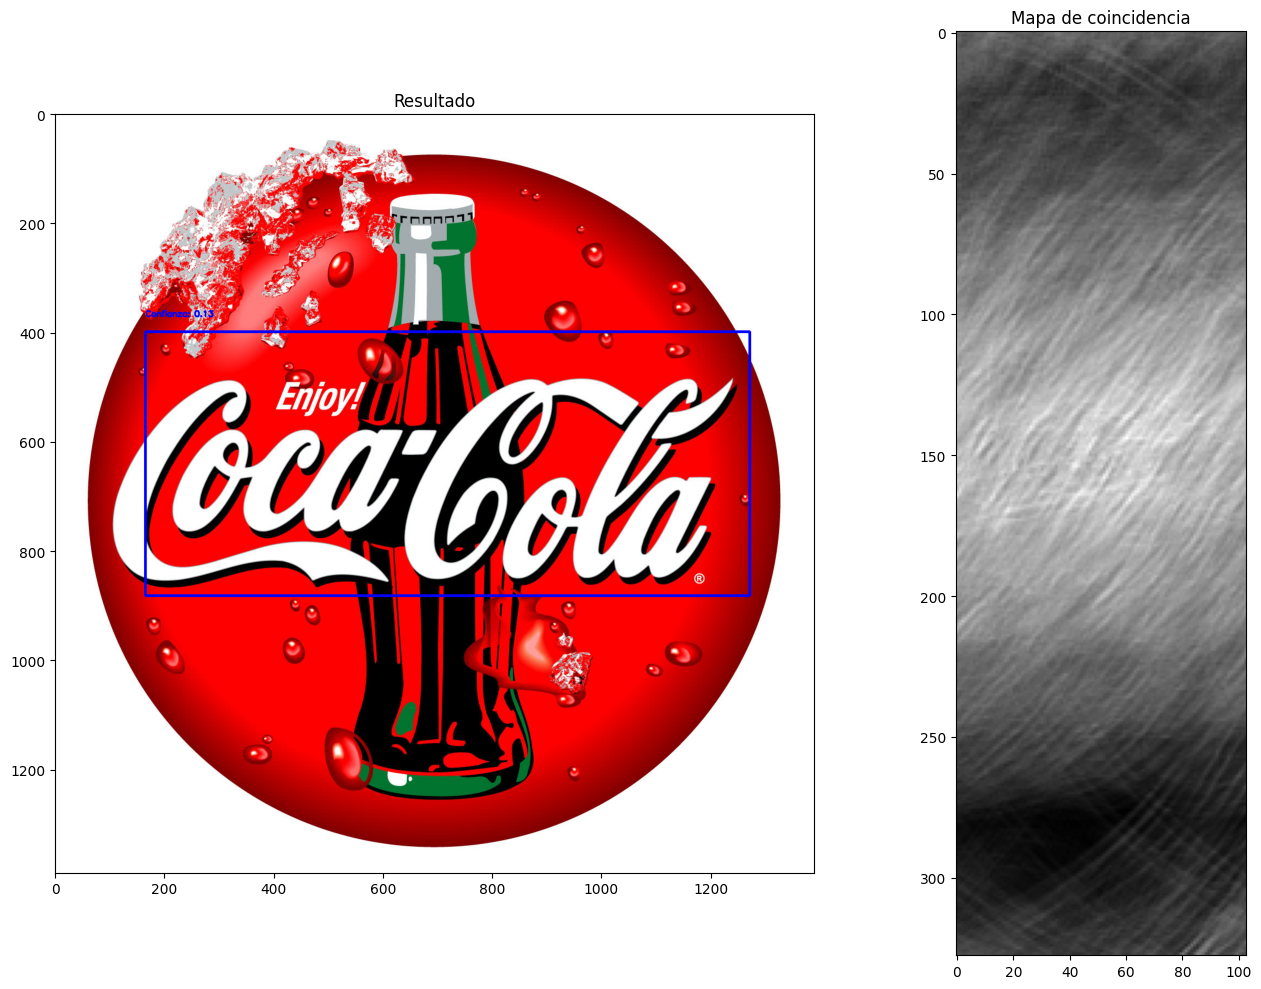

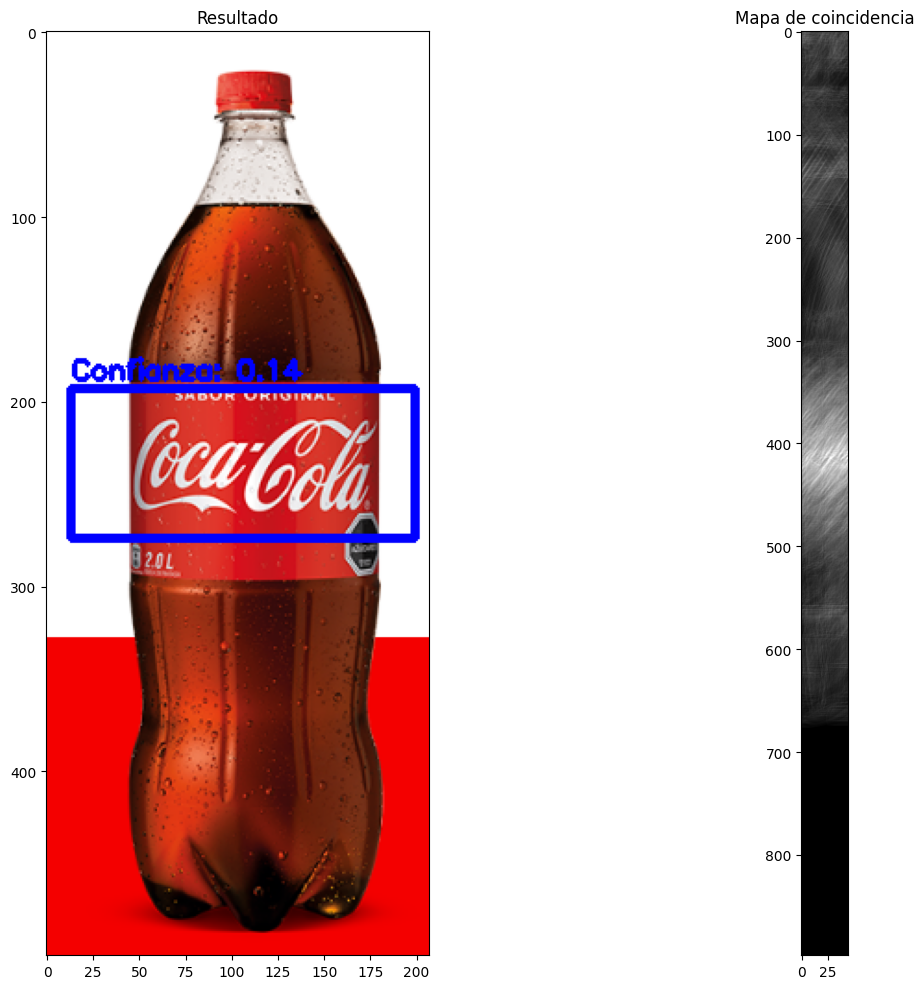

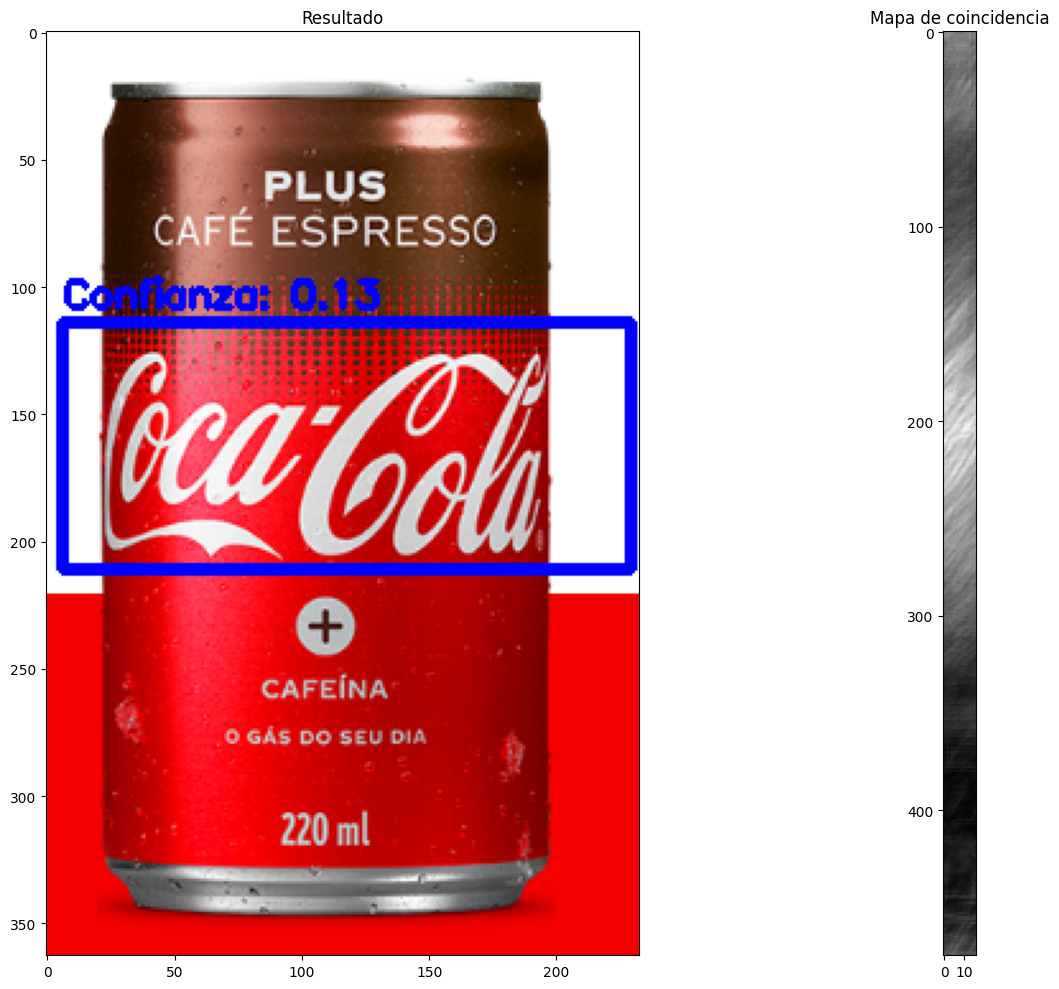

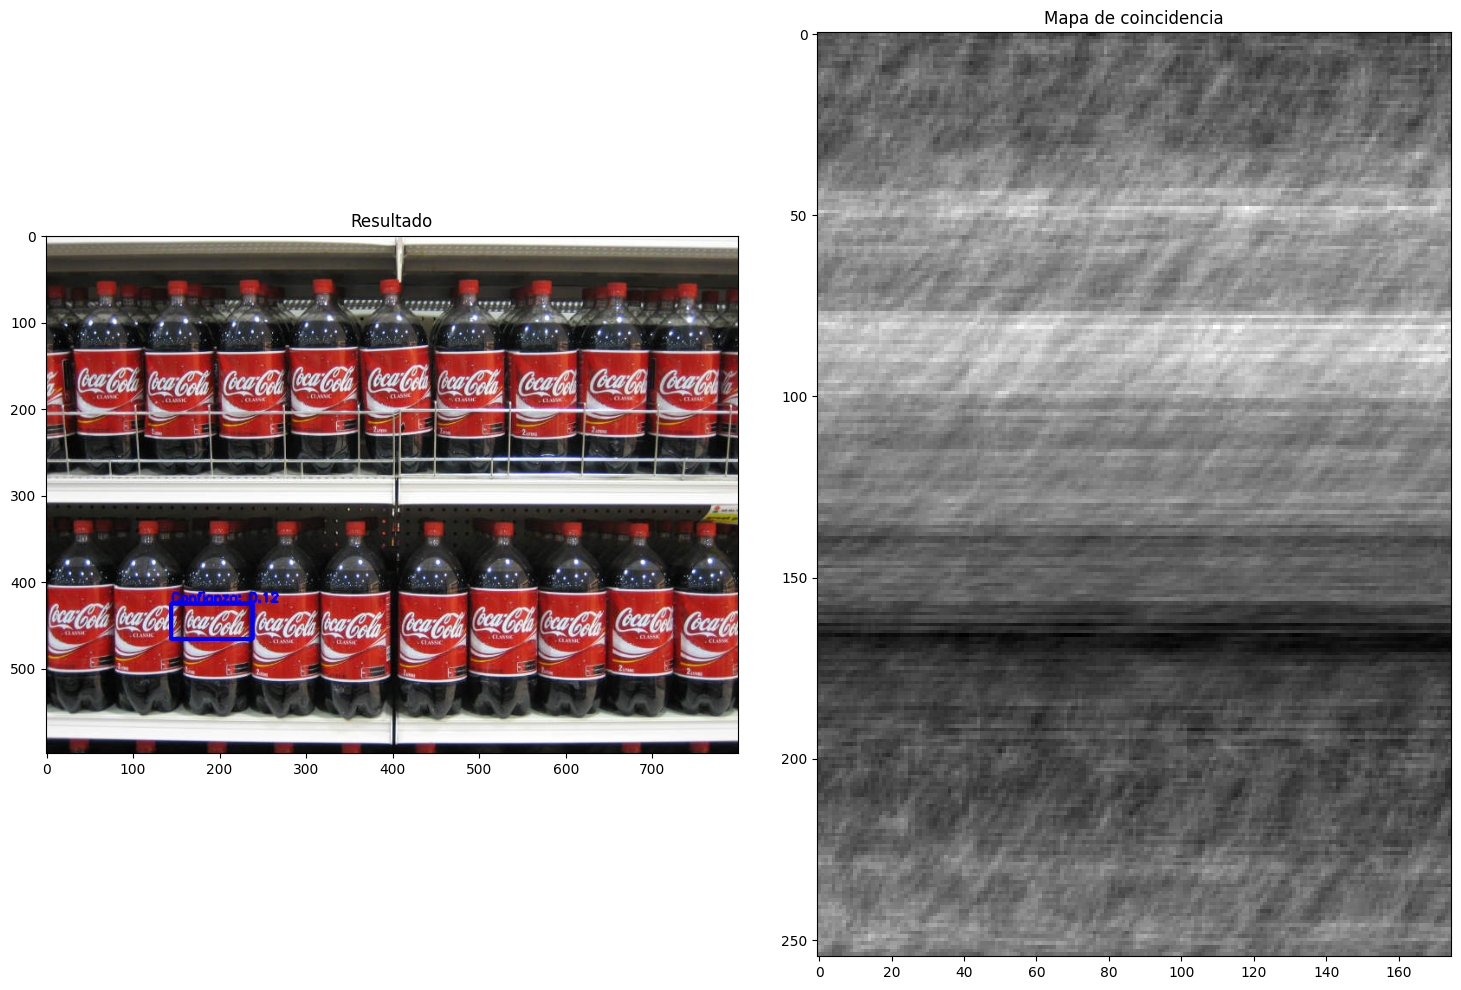

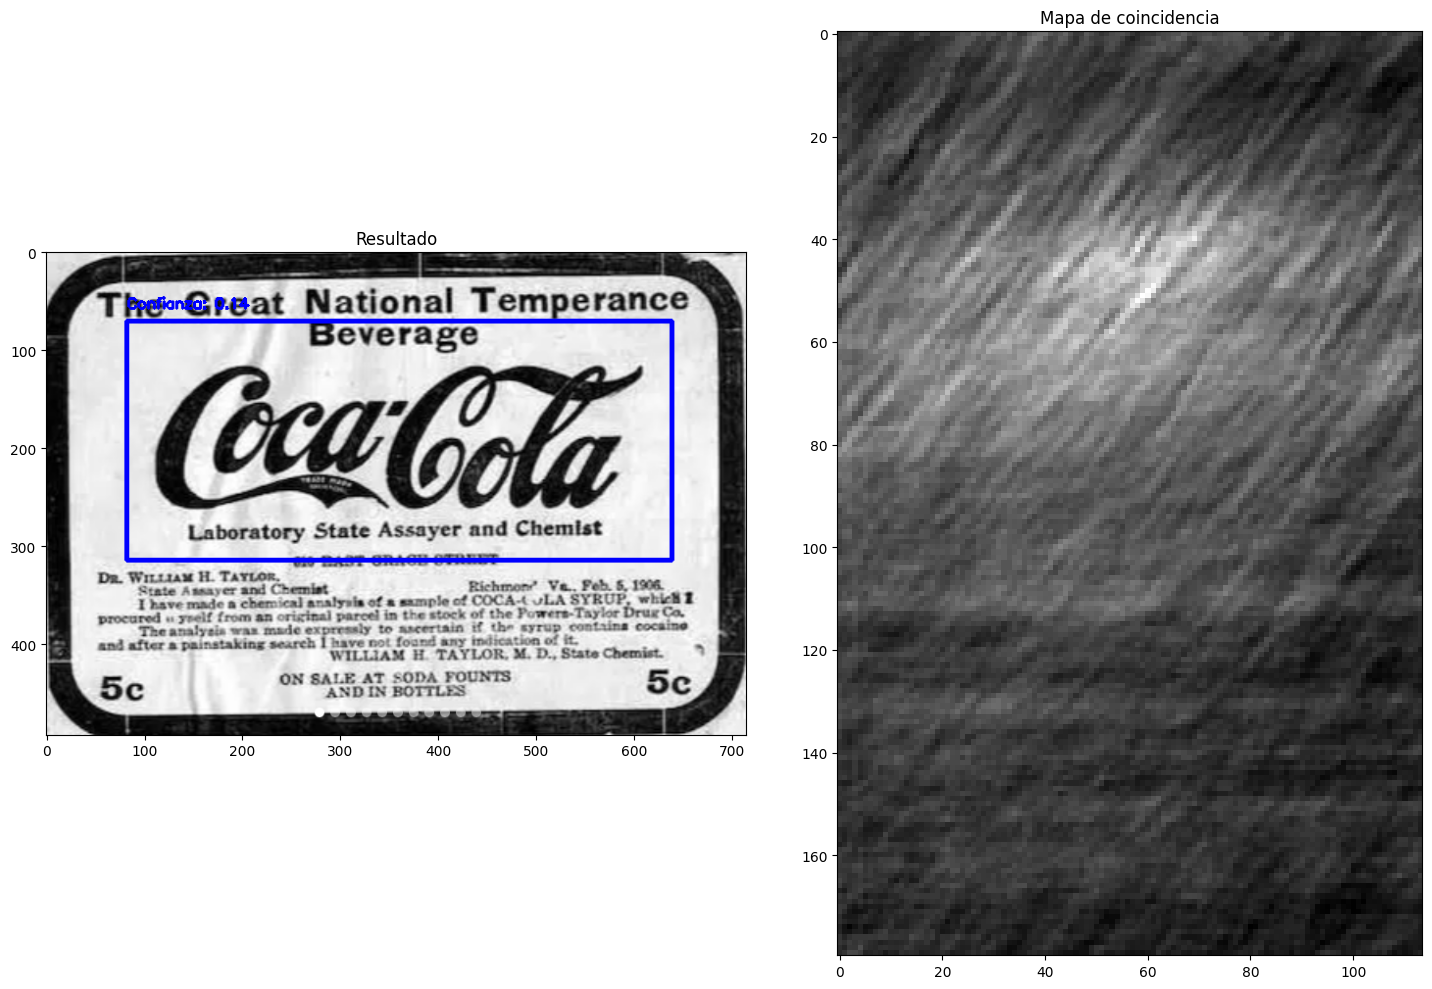

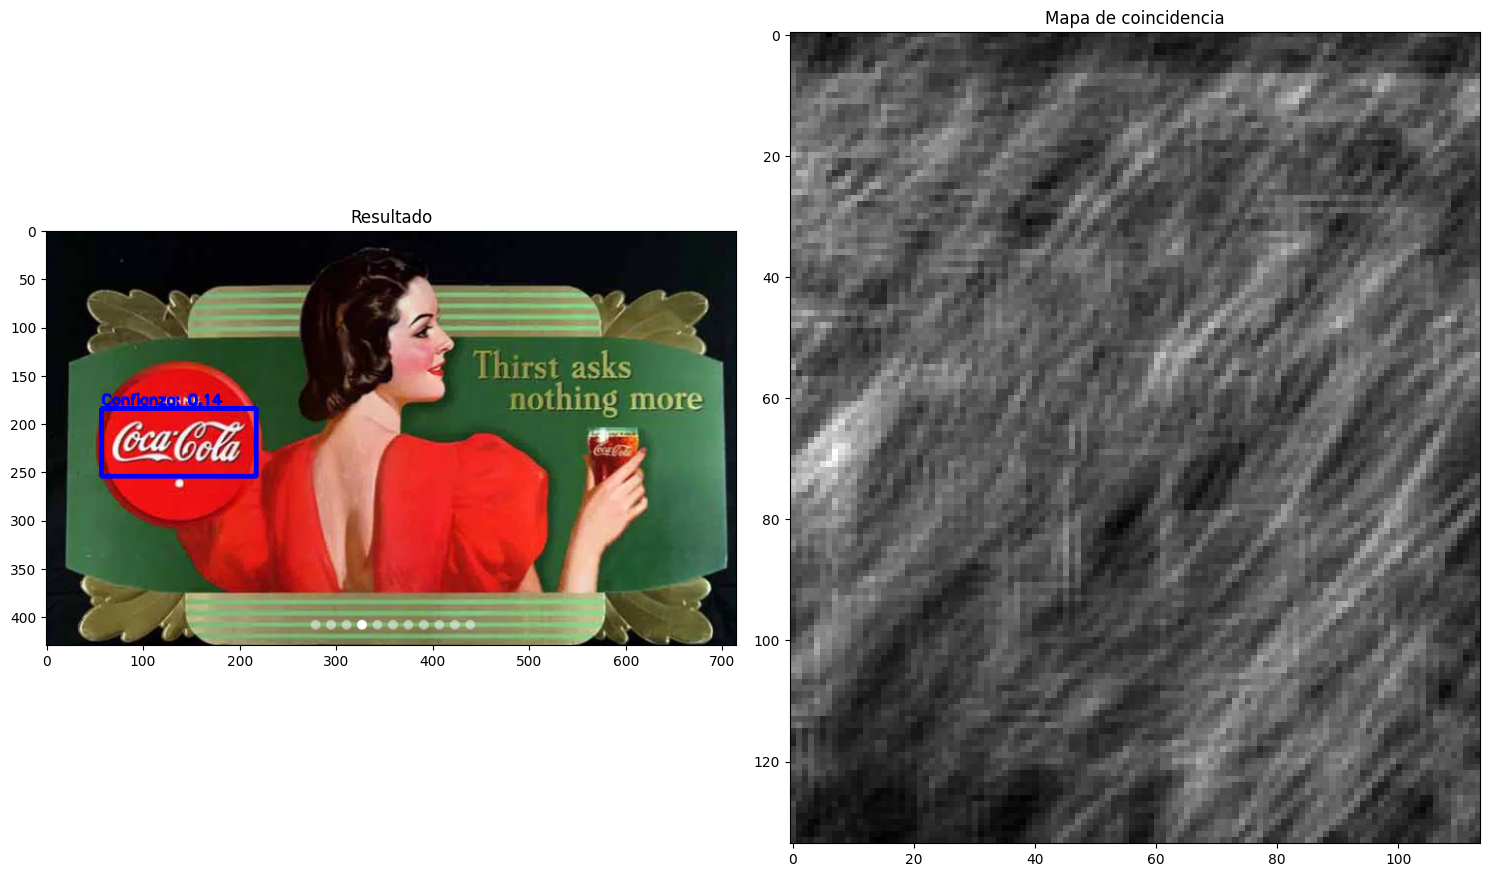

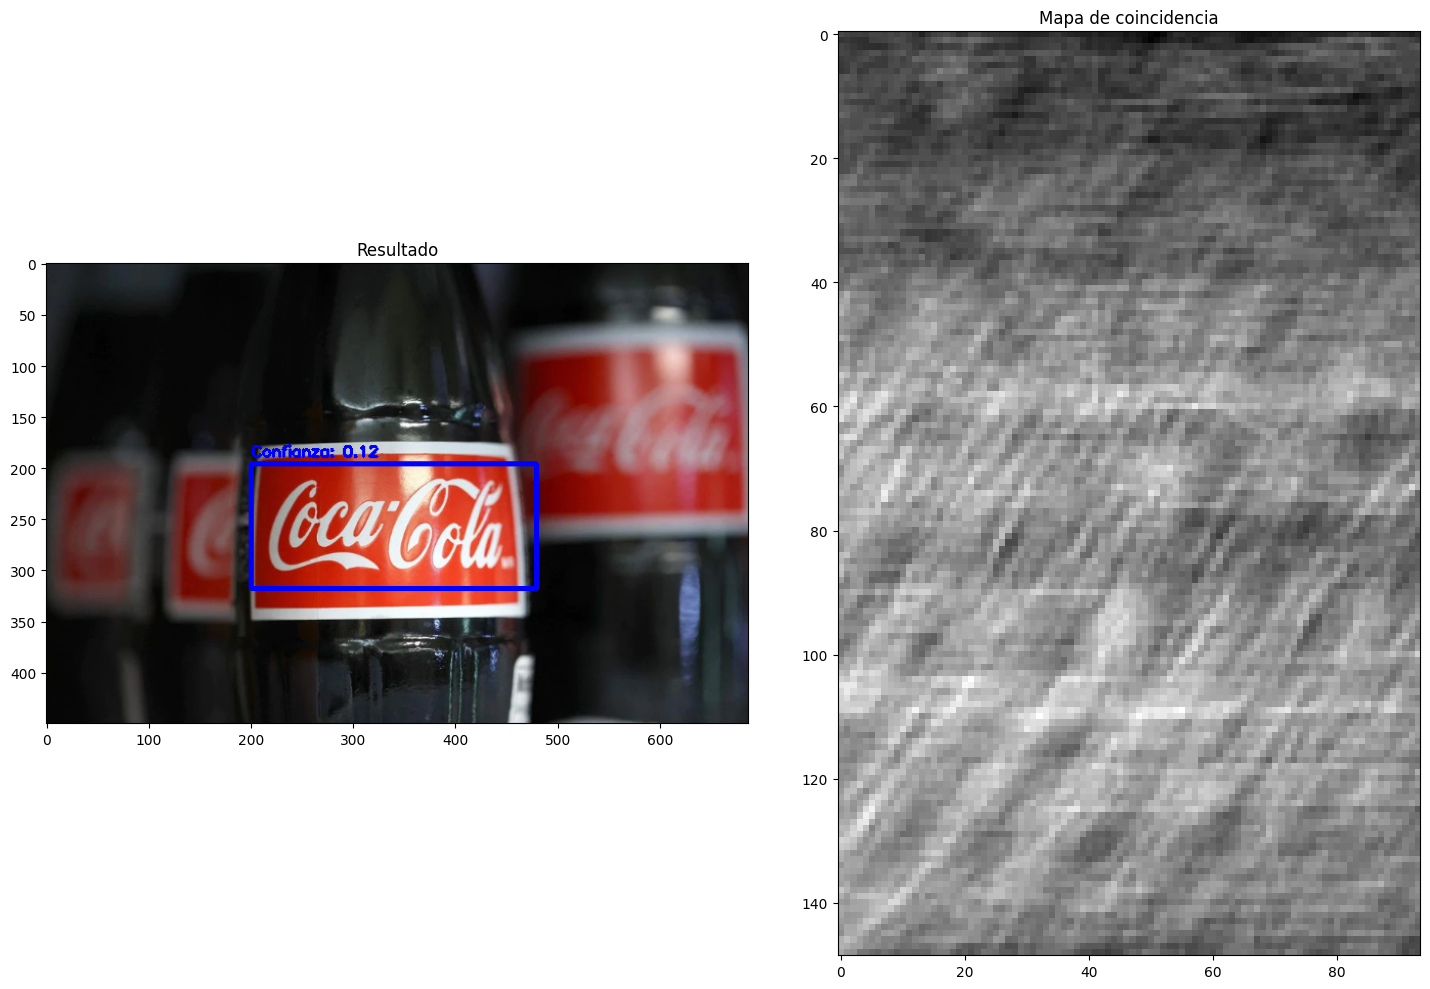

In [46]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Se define un directorio donde se encuentran las imágenes.
directorio = "./images"
imagenes = os.listdir(directorio)
imagenes = [img for img in imagenes if img.endswith(('.png', '.jpg', '.jpeg'))]

# Carga del template
template = cv2.imread('./template/pattern.png', cv2.IMREAD_GRAYSCALE)
template_c = cv2.Canny(template, 50, 200)  # Aplicar Canny al template para detectar bordes

# Procesamiento de todas las imágenes
for imagen_path in imagenes:
    imagen_path = os.path.join(directorio, imagen_path)
    imagen = cv2.imread(imagen_path, cv2.IMREAD_COLOR)
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))  # Crear figura para mostrar resultados
    output = imagen.copy()  # Copiar la imagen original para dibujar las detecciones

    # Búsqueda de plantilla en varias escalas de la imagen
    mejor_match = None
    mejor_escala = None
    mejor_confianza = None
    for scale in np.linspace(0.005, 5.0, 15)[::-1]:  # Bucle sobre diferentes escalas
        imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)  # Convertir imagen a escala de grises
        rescaled_imagen = cv2.resize(imagen_gray, (int(imagen_gray.shape[1] * scale), int(imagen_gray.shape[0] * scale)), interpolation=cv2.INTER_AREA)  # Redimensionar la imagen de acuerdo a la escala actual
        imagen_gauss = cv2.GaussianBlur(rescaled_imagen, (7, 7), 11)  # Aplicar filtro Gaussiano para suavizar la imagen
        tadap = cv2.adaptiveThreshold(imagen_gauss, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 21)  # Aplicar umbral adaptativo
        rescaled_imagen_c = cv2.Canny(tadap, 240, 250)  # Aplicar Canny para detectar bordes

        if rescaled_imagen.shape[0] < template.shape[0] or rescaled_imagen.shape[1] < template.shape[1]:  # Verificar si la imagen escalada es más pequeña que el template
            continue

        res = cv2.matchTemplate(rescaled_imagen_c, template_c, cv2.TM_CCORR_NORMED)  # Realizar template matching
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if mejor_match is None or max_val > mejor_match:
            mejor_match = max_val
            mejor_escala = scale
            mejor_confianza = max_val
            mejor_coords = max_loc

    if mejor_match > 0.1:
        pt = mejor_coords
        cv2.rectangle(output, (int(pt[0] / mejor_escala), int(pt[1] / mejor_escala)),
                      (int((pt[0] + template.shape[1]) / mejor_escala), int((pt[1] + template.shape[0]) / mejor_escala)), (255, 0, 0), 3)
        cv2.putText(output, f'Confianza: {mejor_confianza:.2f}', (int(pt[0] / mejor_escala), int((pt[1] - 10) / mejor_escala)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Mostrar el resultado
    axs[0].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Resultado')
    axs[1].imshow(res, cmap='gray')
    axs[1].set_title('Mapa de coincidencia')
    plt.tight_layout()
    plt.show()





1. Se define un directorio donde se encuentran las imágenes y se carga el template.
2. Para cada imagen en el directorio:
   a. Se lee la imagen y se crea una copia para mostrar el resultado.
   b. Se realiza un bucle sobre diferentes escalas para buscar el template en la imagen en diferentes tamaños.
   c. Se convierte la imagen a escala de grises y se suaviza con un filtro Gaussiano.
   d. Se aplica un umbral adaptativo a la imagen suavizada.
   e. Se detectan los bordes en la imagen utilizando el detector de bordes Canny.
   f. Se realiza el Template Matching entre la imagen y el template.
   g. Se encuentra la detección más confiable basada en el valor de coincidencia (match) y su escala.
   h. Si se encuentra una detección con suficiente confianza, se dibuja un rectángulo alrededor de la detección y se muestra su nivel de confianza.
   i. Se muestra el resultado de la detección junto con el mapa de coincidencia.

###  Algoritmos Utilizados:
- **Canny Edge Detector**: Algoritmo utilizado para detectar los bordes en las imágenes, basado en la variación de intensidad de píxeles en la imagen.
- **Template Matching**: Algoritmo utilizado para buscar y encontrar la posición de un template (patrón) dentro de una imagen de forma automatizada, comparando la similitud entre el template y las subregiones de la imagen.

La combinación de estos algoritmos permite buscar un patrón específico en varias imágenes y resaltar las detecciones más confiables con un rectángulo y su nivel de confianza.